In [79]:
import pandas as pd
import requests 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas
from shapely.geometry import Point, Polygon

### Retrieval of homicide data

In [187]:
#Get countries from the worldbank API
req_URL  = f"https://api.worldbank.org/v2/country?format=json&per_page=300"
res = requests.get(req_URL)
country_info = res.json()[1]

In [20]:
#filter out countries in Latin America and the Caribbean
latam_countries = list(filter(lambda x: x['region']['id'] == 'LCN', country_info))

In [189]:
#convert the list of dictionaries into a dataframe
latam_df = pd.DataFrame(latam_countries)
latam_df.head()

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Oranjestad,-70.0167,12.5167
1,ARG,AR,Argentina,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': 'LAC', 'iso2code': 'XJ', 'value': 'Lati...","{'id': 'UMC', 'iso2code': 'XT', 'value': 'Uppe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Buenos Aires,-58.4173,-34.6118
2,ATG,AG,Antigua and Barbuda,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Saint John's,-61.8456,17.1175
3,BHS,BS,"Bahamas, The","{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Nassau,-77.339,25.0661
4,BLZ,BZ,Belize,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': 'LAC', 'iso2code': 'XJ', 'value': 'Lati...","{'id': 'LMC', 'iso2code': 'XN', 'value': 'Lowe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Belmopan,-88.7713,17.2534


In [190]:
def getHomicideRate(countryCode):
    try:
        homicide_indicator_WB = 'VC.IHR.PSRC.P5'
        req_URL = f"https://api.worldbank.org/v2/country/{countryCode}/indicator/{homicide_indicator_WB}?format=json"
        res = requests.get(req_URL).json()[1]
        #remove all Null values
        filtered_res = list(filter(lambda x: x['value'], res))
        latest_value = filtered_res[0]['value']
        return latest_value
    except Exception as e:
        print (e)
        return None

In [191]:
#get latest homicide rate for each country in latam and append it to the relevant 
latam_df['homicide_rate'] = latam_df['iso2Code'].apply(getHomicideRate)
latam_df.head()

list index out of range


,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,homicide_rate
0,ABW,AW,Aruba,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Oranjestad,-70.0167,12.5167,1.927228
1,ARG,AR,Argentina,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': 'LAC', 'iso2code': 'XJ', 'value': 'Lati...","{'id': 'UMC', 'iso2code': 'XT', 'value': 'Uppe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Buenos Aires,-58.4173,-34.6118,5.324479
2,ATG,AG,Antigua and Barbuda,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Saint John's,-61.8456,17.1175,11.061090
3,BHS,BS,"Bahamas, The","{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Nassau,-77.339,25.0661,31.958171
4,BLZ,BZ,Belize,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': 'LAC', 'iso2code': 'XJ', 'value': 'Lati...","{'id': 'LMC', 'iso2code': 'XN', 'value': 'Lowe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Belmopan,-88.7713,17.2534,37.788570


In [197]:
#drop any rows with null or empty values
latam_df.dropna(inplace=True)
latam_df.replace('', None, inplace=True)
latam_df.isnull().sum()

id               0
iso2Code         0
name             0
region           0
adminregion      0
incomeLevel      0
lendingType      0
capitalCity      0
longitude        0
latitude         0
homicide_rate    0
dtype: int64

In [193]:
latam_df.describe()

,homicide_rate
count,41.000000
mean,19.217074
std,14.005822
min,1.927228
25%,7.185948
50%,12.060453
75%,29.071062
max,52.018926


In [198]:
#A look at the most violent countries in the region
latam_df.nlargest(10,'homicide_rate')

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,homicide_rate
32,SLV,SV,El Salvador,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': 'LAC', 'iso2code': 'XJ', 'value': 'Lati...","{'id': 'LMC', 'iso2code': 'XN', 'value': 'Lowe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",San Salvador,-89.2073,13.7034,52.018926
41,VIR,VI,Virgin Islands (U.S.),"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Charlotte Amalie,-64.8963,18.3358,49.277889
22,JAM,JM,Jamaica,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': 'LAC', 'iso2code': 'XJ', 'value': 'Lati...","{'id': 'UMC', 'iso2code': 'XT', 'value': 'Uppe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Kingston,-76.792,17.9927,43.852282
20,HND,HN,Honduras,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': 'LAC', 'iso2code': 'XJ', 'value': 'Lati...","{'id': 'LMC', 'iso2code': 'XN', 'value': 'Lowe...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Tegucigalpa,-87.4667,15.1333,38.925591
4,BLZ,BZ,Belize,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': 'LAC', 'iso2code': 'XJ', 'value': 'Lati...","{'id': 'LMC', 'iso2code': 'XN', 'value': 'Lowe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Belmopan,-88.7713,17.2534,37.788570
39,VEN,VE,"Venezuela, RB","{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'INX', 'iso2code': 'XY', 'value': 'Not ...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Caracas,-69.8371,9.08165,36.687635
38,VCT,VC,St. Vincent and the Grenadines,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': 'LAC', 'iso2code': 'XJ', 'value': 'Lati...","{'id': 'UMC', 'iso2code': 'XT', 'value': 'Uppe...","{'id': 'IDB', 'iso2code': 'XH', 'value': 'Blend'}",Kingstown,-61.2653,13.2035,36.540693
23,KNA,KN,St. Kitts and Nevis,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Basseterre,-62.7309,17.3,36.085884
3,BHS,BS,"Bahamas, The","{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Nassau,-77.339,25.0661,31.958171
36,TTO,TT,Trinidad and Tobago,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Port-of-Spain,-61.4789,10.6596,30.649507


### Plotting on the regional map

In [199]:
#Import the shapefile of the world
world = geopandas.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

In [200]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [204]:
"""
Append the regional homicide rate data to the world dataframe
"""
def appendHomicideRate(countryCode):
    try:
        country_row = latam_df[latam_df['id'] == countryCode]
        hom_rate = country_row['homicide_rate'].values[0]
        return hom_rate
    except Exception as e:
        return None

In [209]:
#add the homicide rate the dataframe for the world
world['homicide_rate'] = world2['SOV_A3'].apply(appendHomicideRate)

Text(-85, -65, '*Plot created by Jordan Barrett, data sourced from The World Bank')

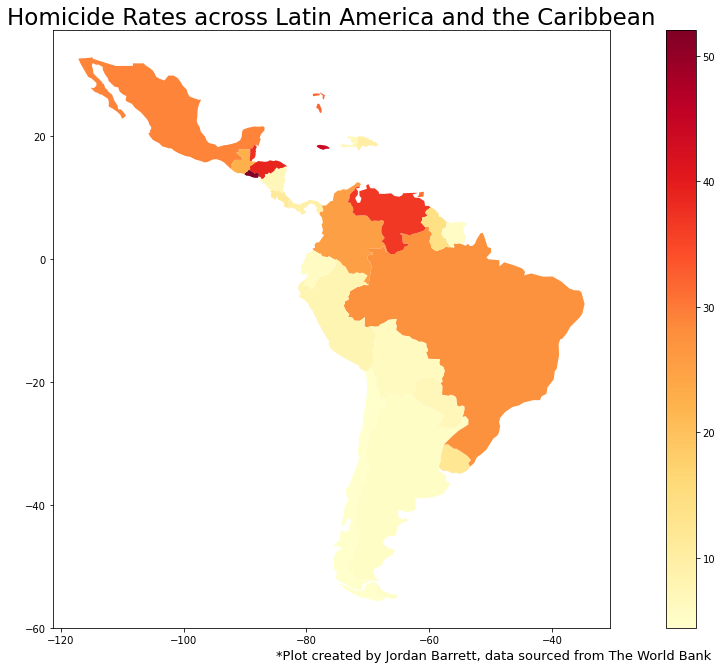

In [210]:
#plot the region with a homicide heatmap
world.plot(column='homicide_rate', cmap='YlOrRd', legend=True)
plt.rcParams["figure.figsize"] = (20,11)
plt.title("Homicide Rates across Latin America and the Caribbean", fontsize=23)
plt.text(-85,-65,"*Plot created by Jordan Barrett, data sourced from The World Bank", fontsize=13)